<a href="https://colab.research.google.com/github/amalaelmi/animal-decision-tree/blob/main/animals_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import pydotplus
from IPython.display import Image

In [2]:
data = pd.read_csv('/content/animals.csv', header='infer')

In [3]:
data.head()

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
data['Class'] = data['Class'].apply(lambda x: 1 if x == 1 else 0)

In [15]:
data.head()

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
y = data['Class']

In [17]:
X = data.drop(['Sr', 'Class'], axis=1)

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf = clf.fit(X, y)

In [20]:
clf = clf.fit(X, y)

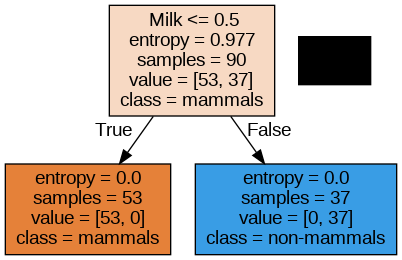

In [21]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals', 'non-mammals'], filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [22]:
testData = [
    [1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1],
    [1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1],
    [0,0,1,0,0,1,1,1,0,0,0,1,2,1,0,0],
    [1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]
]

In [23]:
test = pd.DataFrame(testData, columns=X.columns)

In [53]:
del print

In [55]:
predY = clf.predict(test)
print(predY)

[1 1 0 1]


In [51]:
testY = [1, 1, 0, 1]

In [38]:
# calculate accuracy
accuracy = accuracy_score(testY, predY)


In [56]:
print('Accuracy on test data is %.2f' % (accuracy * 100))

Accuracy on test data is 100.00


In [60]:
# Convert testData to a Pandas DataFrame.
predictions = pd.concat([pd.DataFrame(testData), pd.Series(predY, name='Predicted Class')], axis=1)
print(predictions)

   0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  Predicted Class
0  1  0  0  1  0  0  1  1  1  1   0   0   4   0   0   1                1
1  1  0  0  1  0  0  0  1  1  1   0   0   4   1   0   1                1
2  0  0  1  0  0  1  1  1  0  0   0   1   2   1   0   0                0
3  1  0  0  1  0  0  1  1  1  1   0   0   4   0   0   1                1


In [62]:
print(predictions.to_string())

   0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  Predicted Class
0  1  0  0  1  0  0  1  1  1  1   0   0   4   0   0   1                1
1  1  0  0  1  0  0  0  1  1  1   0   0   4   1   0   1                1
2  0  0  1  0  0  1  1  1  0  0   0   1   2   1   0   0                0
3  1  0  0  1  0  0  1  1  1  1   0   0   4   0   0   1                1
